<a name="cell-solving"></a>

### 6.  [Iterative Methods](#cell-sovling-iterative)
1. [Gauss-Seidel](#cell-sovling-gauss-seidel)
    1. [Memory, Sparsity, Computation](#cell-sovling-Jacobi)
    2. [Convergence](#cell-sovling-gauss-seidel-conv) 
    3. [Successive Overrelaxation](#cell-sovling-overrelaxation)
2. [Coordinate Descent](#cell-sovling-coordesent)
    1. [Gradients](#cell-sovling-gradients)
    2. [Norms (and Metrics)](#cell-sovling-coordesent-quad)
    3. [Coordinate Descent AKA Nonlinear Gauss-Seidel](#cell-opt-fx-gauss-seidel)
    4. [Line Search (and Direction Search)](#cell-opt-fx-linesearch)
3. [Gradient (Steepest Direction) Descent](#cell-sovling-gradients-steepest): STA410_W24_Week6_Homework_GradientDescent.ipynb
    1. [`AutoDiff` (Automatic Differentiation)](#cell-sovling-gradients-auto)
    2. [When can Gradient Descent work perfectly?](#cell-sovling-gdall)
    

<a name="cell-sovling-iterative"></a>
# 6 Iterative Methods ([Return to TOC](#cell-solving))
---

$\;\;\bullet\;\;$ ***QR decomposition*** or ***SVD*** of $X_{n\times m}\; (n>m)$ to find $\hat \beta$ where $X_{n\times m}\hat \beta \approx y  \longrightarrow  \text{is } O(nm^2)$

$\;\;\bullet\;\;$ ***Gramian*** computation $X^T\!X \longrightarrow  \text{also } O(nm^2)\;  \color{gray}{\text{but substantially proportionally faster}}$ 

$\;\;\bullet\;\;$ ***Gaussian elimination*** or ***Cholesky decomposition*** (given $X^T\!X$) and ***backward substitution***<br> $\quad\;\;$subsequently <font style='color:blue'>solving</font> $X^T\!X\hat \beta = X^Ty  \longrightarrow   \text{is } \color{blue}{O(m^3)} + O(m^2) \; \color{gray}{\text{way faster than $O(nm^2)$}}$


<font style='color:white'>But the $\color{white}{O(m^3)}$ ***direct methods*** above may 
be replaced with more efficient $\color{white}{O(sm^2)} \;(s<m)$ ***iterative methods***  <font style='color:white'>which iteratively increase the accuracy of approximation solutions</font></font>

<font style='color:white'>$\Longrightarrow$ The computational tradeoff is the <u>*number of steps*</u> versus the <u>*per step cost/effectiveness*</u></font>

<font style='color:white'>$\Longrightarrow$ ***Initial values*** $\hat \beta^{(0)}$ are generally crucial, and ***stopping criterion*** limit diminishing returns</font>

<font style='color:white'>$$\Delta(\hat \beta^{(k)}, \hat \beta^{(k+1)}) < \epsilon \quad \text{ or } \quad
\Delta(\hat \beta^{(k)}, \hat \beta^{(k+1)}) < \epsilon |\hat \beta^{(k)}| 
\quad \text{to limiting } k < m$$</font>

<a name="cell-sovling-iterative2"></a>
# 6 Iterative Methods ([Return to TOC](#cell-solving))
---

$\;\;\bullet\;\;$ ***QR decomposition*** or ***SVD*** of $X_{n\times m}\; (n>m)$ to find $\hat \beta$ where $X_{n\times m}\hat \beta \approx y  \longrightarrow  \text{is } O(nm^2)$

$\;\;\bullet\;\;$ ***Gramian*** computation $X^T\!X \longrightarrow  \text{also } O(nm^2)\;  \color{gray}{\text{but substantially proportionally faster}}$ 

$\;\;\bullet\;\;$ ***Gaussian elimination*** or ***Cholesky decomposition*** (given $X^T\!X$) and ***backward substitution***<br> $\quad\;\;$subsequently <font style='color:blue'>solving</font> $X^T\!X\hat \beta = X^Ty  \longrightarrow   \text{is } \color{blue}{O(m^3)} + O(m^2) \; \color{gray}{\text{way faster than $O(nm^2)$}}$


But the $\color{blue}{O(m^3)}$ ***direct methods*** above may 
be replaced with more efficient $\color{red}{O(sm^2)} \;(s<m)$ ***iterative methods***  <font style='color:gray'>which iteratively increase the accuracy of approximation solutions</font>


<font style='color:white'>$\Longrightarrow$ The computational tradeoff is the <u>*number of steps*</u> versus the <u>*per step cost/effectiveness*</u></font>

<font style='color:white'>$\Longrightarrow$ ***Initial values*** $\hat \beta^{(0)}$ are generally crucial, and ***stopping criterion*** limit diminishing returns</font>

<font style='color:white'>$$\Delta(\hat \beta^{(k)}, \hat \beta^{(k+1)}) < \epsilon \quad \text{ or } \quad
\Delta(\hat \beta^{(k)}, \hat \beta^{(k+1)}) < \epsilon |\hat \beta^{(k)}| 
\quad \text{to limiting } k < m$$</font>

<a name="cell-sovling-iterative3"></a>
# 6 Iterative Methods ([Return to TOC](#cell-solving))
---

$\;\;\bullet\;\;$ ***QR decomposition*** or ***SVD*** of $X_{n\times m}\; (n>m)$ to find $\hat \beta$ where $X_{n\times m}\hat \beta \approx y  \longrightarrow  \text{is } O(nm^2)$

$\;\;\bullet\;\;$ ***Gramian*** computation $X^T\!X \longrightarrow  \text{also } O(nm^2)\;  \color{gray}{\text{but substantially proportionally faster}}$ 

$\;\;\bullet\;\;$ ***Gaussian elimination*** or ***Cholesky decomposition*** (given $X^T\!X$) and ***backward substitution***<br> $\quad\;\;$subsequently <font style='color:blue'>solving</font> $X^T\!X\hat \beta = X^Ty  \longrightarrow   \text{is } \color{blue}{O(m^3)} + O(m^2) \; \color{gray}{\text{way faster than $O(nm^2)$}}$

But the $\color{blue}{O(m^3)}$ ***direct methods*** above may 
be replaced with more efficient $\color{red}{O(sm^2)} \;(s<m)$ ***iterative methods***  <font style='color:gray'>which iteratively increase the accuracy of approximation solutions</font>

$\Longrightarrow$ The computational tradeoff is the <u>*number of steps*</u> versus the <u>*per step cost/effectiveness*</u> 

$\Longrightarrow$ ***Initial values*** $\hat \beta^{(0)}$ are generally crucial, and ***stopping criterion*** limit diminishing returns

$$\Delta(\hat \beta^{(k)}, \hat \beta^{(k+1)}) < \epsilon \quad \text{ or } \quad
\Delta(\hat \beta^{(k)}, \hat \beta^{(k+1)}) < \epsilon |\hat \beta^{(k)}| 
\quad \text{to limiting } k < m$$



<a name="cell-sovling-gauss-seidel"></a>
## 6.1 Gauss-Seidel ([Return to TOC](#cell-solving))
---

The $O(sn^2)$ ***Gauss-Seidel*** method  utilizes an ***additive*** (rather than ***multiplicative***) ***factorization***

\begin{align*}
\color{gray}{X^T\!X \hat \beta = X^T \! y \; \Rightarrow \;}
A_{n \times n}x = {} & b \quad \color{gray}{A = (L + D + U) \text{ decomposition costs nothing}} \\
(L + D + U)x = {} & b \quad \color{gray}{\text{$D$ diagonal $L$/$U$ zero diagonal upper/lower triangular}} \\ \hline
(L+D)x^{(k+1)} = {} & b -  Ux^{(k)} \\
x^{(k+1)} = {} & (D+L)^{-1}b - (D+L)^{-1}Ux^{(k)} \color{gray}{= v + Cx^{(k)} \leftarrow \text{converge?}}\\
\color{blue}{\text{or just } \quad Dx^{(k+1)}} = {} & \color{blue}{b - Lx^{(k+1)} - Ux^{(k)}} 
\end{align*}

suggesting the sequence of updates which iteratively improve(?) solution approximations

$$\color{blue}{x^{(k+1)}_i = \frac{1}{a_{ii}}\left( b_i - \sum_{j=1}^{i-1} a_{ij}x_j^{(k+1)} - \sum_{j=i+1}^{n} a_{ij}x_j^{(k)} \right)} \quad 
\color{red}{\text{started with some initial value $x^{(0)}$}}$$


<a name="cell-sovling-Jacobi"></a>
### 6.1.A Memory, Sparsity, Computation ([Return to TOC](#cell-solving))

---

Updating $x^{(k+1)}$ only based on the elements of $x^{(k)}$ is called the ***Jacobi algorithm***<br><font style='color:gray'>(and requires both $x^{(k)}$ and $x^{(k+1)}$ be stored in memory)</font>

$$x^{(k+1)}_i = \frac{1}{a_{ii}}\left( b_i - \sum_{j=1}^{i-1} a_{ij}x_j^{\overset{\color{red}{\text{or }(k)}}{(k+1)}} - \sum_{j=i+1}^{n} a_{ij}x_j^{(k)} \right)$$

<font style='color:white'>A single step of ***Gauss-Seidel*** is $O(n^2)$ <font style='color:white'>(and can can be done "in-place" without saving $x^{(k)}$)</font><font?
- <font style='color:white'>Each $x_i^{(k+1)}$ update for $i = 1, ..., n$</font>
    - <font style='color:white'>entails $n$ multiplication-divisions plus $n-1$ addition-subtractions</font>
- <font style='color:white'><But if $A$ is relatively ***sparse*** with many $0$'s this becomes $O(n n')$ with $n'<n$</font>

<font style='color:white'>For $s<n'\leq n$ ***Gauss-Seidel*** is $O(snn')$  while ***Gaussian elimination*** is $O(n^3)$<font>

<!-- > - For some extended considerations about ***sparsity*** please see Keith Knight's STA410 [notes2.pdf](https://q.utoronto.ca/courses/296804/files?preview=24222609) document beginning on page 2.-->


<a name="cell-sovling-Jacobi2"></a>
### 6.1.A Memory, Sparsity, Computation ([Return to TOC](#cell-solving))

---

Updating $x^{(k+1)}$ only based on the elements of $x^{(k)}$ is called the ***Jacobi algorithm***<br><font style='color:gray'>(and requires both $x^{(k)}$ and $x^{(k+1)}$ be stored in memory)</font>

$$x^{(k+1)}_i = \frac{1}{a_{ii}}\left( b_i - \sum_{j=1}^{i-1} a_{ij}x_j^{\overset{\color{red}{\text{or }(k)}}{(k+1)}} - \sum_{j=i+1}^{n} a_{ij}x_j^{(k)} \right)$$

A single step of ***Gauss-Seidel*** is $O(n^2)$ <font style='color:gray'>(and can can be done "in-place" without saving $x^{(k)}$)</font>
- Each $x_i^{(k+1)}$ update for $i = 1, ..., n$ 
    - entails $n$ multiplication-divisions plus $n-1$ addition-subtractions
- But if $A$ is relatively ***sparse*** with many $0$'s this becomes $O(n n')$ with $n'<n$

For $s<n'\leq n$ ***Gauss-Seidel*** is $O(snn')$  while ***Gaussian elimination*** is $O(n^3)$

<!-- > - For some extended considerations about ***sparsity*** please see Keith Knight's STA410 [notes2.pdf](https://q.utoronto.ca/courses/296804/files?preview=24222609) document beginning on page 2.-->


<a name="cell-sovling-gauss-seidel-conv"></a>

### 6.1.B Convergence ([Return to TOC](#cell-solving))
---

***Gauss-Seidel*** converges $\quad\Delta(b-Ax^{(k)}, b-Ax^{(k+1)}) \rightarrow 0\quad$ if any of the following hold:

- the ***spectral radius*** (largest ***eigenvalue***) $\quad \rho\left((L + D)^{-1}U\right)<1$ 

    - and convergence is faster for smaller ***spectral radius*** which is proven using convergence properties of the ***matrix power series*** $\sum_{k=0}^{\infty}C^k = (I - C)^{-1}$


- $A$ is ***symmetric***, $A$ and $D$ and $D-L-U = D - L - L^T$ are ***positive definite***

$\quad\quad\quad\quad\bullet\;\;$which is proven based on ***eigenvalues*** of $$C= - (L + D)^{-1} U = - (L + D)^{-1}(D + L - A)$$ 


- $A$ is ***strictly diagonally dominant***  $\quad |a_{ii}| > \sum_{i \neq j} |a_{ij}| \; \text{ for all } i$
    - which is proven using the invertibilty of ***strictly diagonally dominant matrices***


<!-- > See Keith Knight's STA410 [class notes8.pdf](https://q.utoronto.ca/courses/296804/files?preview=24301082) document beginning on page 15 for convergence proofs (and the ***Gauss-Seidel*** and ***Jacobi*** algorithms themselves are introduced beginning on page 10)-->



<a name="cell-sovling-overrelaxation"></a>

### 6.1.C Successive Overrelaxation ([Return to TOC](#cell-solving))
---

***Successive overrelaxation*** uses weighted averages of current $x_i^{(k)}$ and iterative update, so for ***Gauss-Seidel***  
$$x_i^{(k+1)} = \overbrace{\underset{\text{last answer $x_i^{(k)}$}}{\underbrace{(1-\omega)x_i^{(k)}}_{\text{weighted with}}} + \omega}^{\text{if $\omega=1$ this goes away}}\underbrace{\frac{1}{a_{ii}}\left( b_i - \sum_{j=1}^{i-1} a_{ij}x_j^{(k+1)} - \sum_{j=i+1}^{n} a_{ij}x_j^{(k)} \right)}_{\text{and we're just left solving the Gauss-Seidel equations}}$$

$$\scriptsize\begin{align*}
Ax = (L + D + U )x = {} &  b \\ 
\omega Lx + (\omega - 1 + 1) D x = {} & \omega (b -  Ux) \\
\omega Lx +  D x = {} & (1-\omega) Dx + \omega (b -  Ux) \\ \hline
(\omega L +  D) x^{(k+1)} = {} & (1-\omega) Dx^{(k)} + \omega (b -  Ux^{(k)}) \\ 
 D x^{(k+1)} = {} & (1- \omega)Dx^{(k)} + \omega( b -  Lx^{(k+1)} -  Ux^{(k)})  
\end{align*}$$

providing faster convergence if ***spectral radius*** 
$\rho\left((\omega L + D)^{-1}\omega U\right)<\rho\left((L + D)^{-1}U\right)<1$


In [1]:
import numpy as np; import matplotlib.pyplot as plt

# Gauss-Seidel vs Overrelaxation
n = 100; A1_0 = np.diag(np.ones(n)) + 1.0; A0_1 = np.diag(np.ones(n)) + 0.2; 
A0_1cond = np.round(np.linalg.cond(A0_1),2); A1_0cond = np.round(np.linalg.cond(A1_0),2)

x_true = np.ones((n,1)); b1_0 = A1_0.dot(x_true); b0_1 = A0_1.dot(x_true)
x1_0_current_GS = x_true+0.1; x1_0_current_GS_OR = x_true+0.1; x0_1_current_GS = x_true+0.1; x0_1_current_GS_OR = x_true+0.1

L1_0,D1_0,U1_0 = A1_0.copy(),np.diag(np.diag(A1_0)),A1_0.copy()
# https://numpy.org/doc/stable/reference/generated/numpy.tril_indices.html
L1_0[np.triu_indices(n)] = 0; U1_0[np.tril_indices(n)] = 0
L0_1,D0_1,U0_1 = A0_1.copy(),np.diag(np.diag(A0_1)),A0_1.copy()
L0_1[np.triu_indices(n)] = 0; U0_1[np.tril_indices(n)] = 0

gauss_seidel_trajectory0_1 = np.zeros(int(n/2))
gauss_seidel_trajectory1_0 = np.zeros(int(n/2))
gauss_seidel_overrelaxation_trajectory0_1 = np.zeros(int(n/2))
gauss_seidel_overrelaxation_trajectory1_0 = np.zeros(int(n/2))
for i in range(int(n/2)):

  # Gauss-Seidel

  x0_1_current_GS = np.linalg.solve(L0_1+D0_1, b0_1 - U0_1.dot(x0_1_current_GS))
  delta0_1_GS = x_true - x0_1_current_GS
  gauss_seidel_trajectory0_1[i] = delta0_1_GS.T.dot(delta0_1_GS)**0.5

  x1_0_current_GS = np.linalg.solve(L1_0+D1_0, b1_0 - U1_0.dot(x1_0_current_GS))
  delta1_0_GS = x_true - x1_0_current_GS
  gauss_seidel_trajectory1_0[i] = delta1_0_GS.T.dot(delta1_0_GS)**0.5

  # Successive Overrelaxation 
  omega=0.5

  x0_1_current_GS_OR = np.linalg.solve(omega*L0_1+D0_1,
    (1-omega)*D0_1.dot(x0_1_current_GS_OR) + omega*(b0_1 - U0_1.dot(x0_1_current_GS_OR)))
  delta0_1_GS_OR = x_true - x0_1_current_GS_OR
  gauss_seidel_overrelaxation_trajectory0_1[i] = delta0_1_GS_OR.T.dot(delta0_1_GS_OR)**0.5

  x1_0_current_GS_OR = np.linalg.solve(omega*L1_0+D1_0,
    (1-omega)*D1_0.dot(x1_0_current_GS_OR) + omega*(b1_0 - U1_0.dot(x1_0_current_GS_OR)))
  delta1_0_GS_OR = x_true - x1_0_current_GS_OR
  gauss_seidel_overrelaxation_trajectory1_0[i] = delta1_0_GS_OR.T.dot(delta1_0_GS_OR)**0.5

/var/folders/sd/hnfh4zsn34d7xpbz9226pz200000gn/T/ipykernel_98634/1998370161.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gauss_seidel_trajectory0_1[i] = delta0_1_GS.T.dot(delta0_1_GS)**0.5
/var/folders/sd/hnfh4zsn34d7xpbz9226pz200000gn/T/ipykernel_98634/1998370161.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gauss_seidel_trajectory1_0[i] = delta1_0_GS.T.dot(delta1_0_GS)**0.5
/var/folders/sd/hnfh4zsn34d7xpbz9226pz200000gn/T/ipykernel_98634/1998370161.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before 

### 6.1.C Successive Overrelaxation 
---


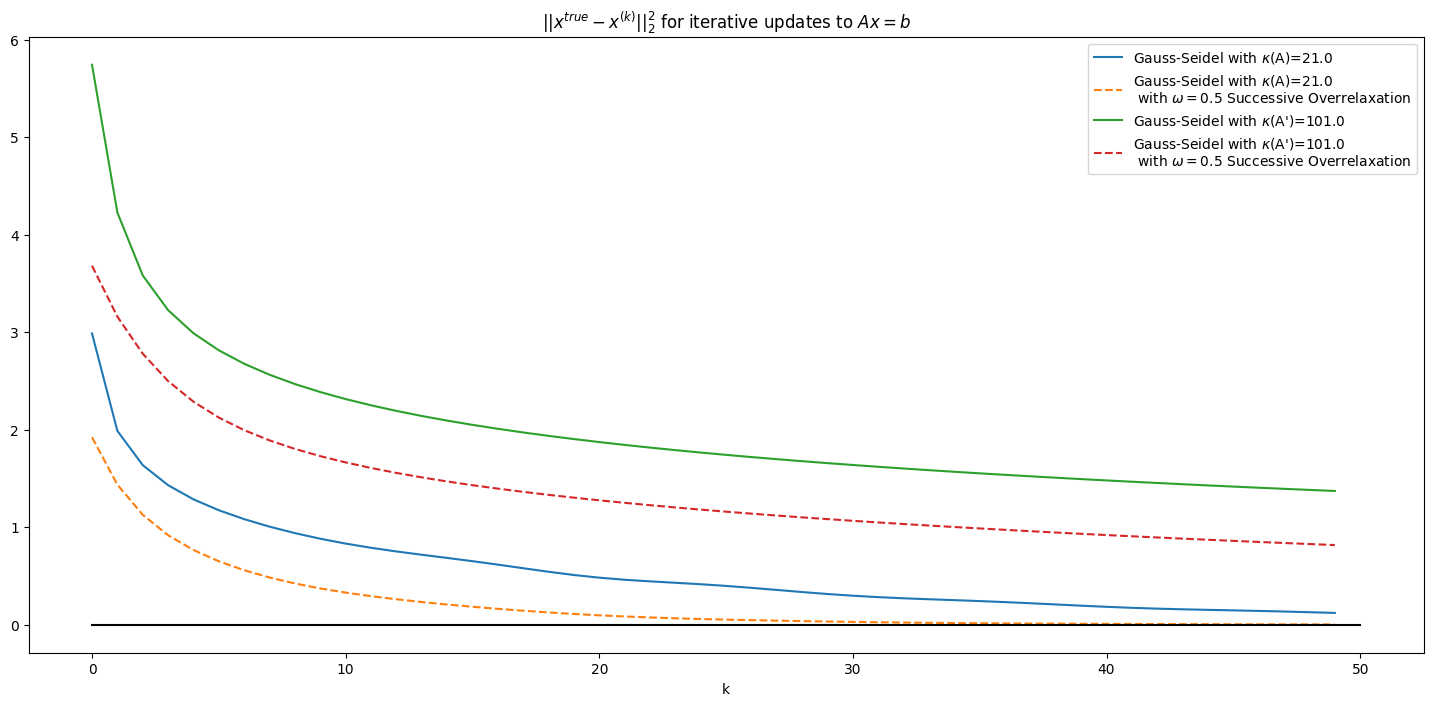

In [3]:
# larger condition number kappa suggests larger spectral radius...
plt.figure(figsize=(18,8)); plt.plot(gauss_seidel_trajectory0_1, label="Gauss-Seidel with $\\kappa$(A)="+str(A0_1cond)); plt.plot(gauss_seidel_overrelaxation_trajectory0_1, label="Gauss-Seidel with $\\kappa$(A)="+str(A0_1cond)+"\n with $\\omega=$" + str(omega) + " Successive Overrelaxation", linestyle='--'); plt.plot(gauss_seidel_trajectory1_0, label="Gauss-Seidel with $\\kappa$(A')="+str(A1_0cond)); plt.plot(gauss_seidel_overrelaxation_trajectory1_0, label="Gauss-Seidel with $\\kappa$(A')="+str(A1_0cond)+"\n with $\\omega=$" + str(omega) + " Successive Overrelaxation", linestyle='--'); plt.plot([0,n/2],2*[0],'k-'); plt.title("$||x^{true}-x^{(k)}||_2^2$ for iterative updates to $Ax = b$"); plt.xlabel("k"); plt.legend();

<a name="cell-sovling-coordesent"></a>

## 6.2 Coordinate Descent ([Return to TOC](#cell-solving))

--- 

***Coordinate descent*** finds an optimum of a scalar valued multivariate function $f(x)$ by iteratively optimizing one variable $x_j$ at a time, cycling through the elements of $x^{(k)}$ until stabilization

Solving $Ax=b$ for ***symmetric positive definite*** $A$ is eqivalent to minimizing the quadratic form

\begin{align*}
f(x) = \frac{1}{2} x^TAx - x^Tb + c ={}& \frac{1}{2}\sum_j\sum_k a_{jk}x_j x_k + \sum_j b_j x_j + c\\
\frac{\partial}{\partial x_i } f(x) = {} & a_{ii}x_i - b_i + \sum_{j \not = i} a_{ij}x_j \; \overset{\text{set to}}{= 0}\\
\Longrightarrow \quad x_i =  {} &\frac{1}{a_{ii}}\left(b_i - \sum_{j \not = i} a_{ij}x_j\right)
\end{align*}

***Gauss-Seidel*** solving $Ax=b$ is actually ***coordinate descent*** quadratic function optimization  



<a name="cell-sovling-gradients"></a>

### 6.2.A Gradients ([Return to TOC](#cell-solving))

--- 

The ***gradient operator*** $\nabla_{x}$ generalizes the ***derivative*** for scalar quantities as the vector of ***partial derivatives*** with respect to the input $x_i$ of its scalar valued multivariate function argument $f_x$

$$ \nabla_{x}(f_x) = \frac{\partial f_x}{\partial x_1} e_1 + \cdots + \frac{\partial f_x}{\partial x_i} e_i + \cdots + \frac{\partial f_x}{\partial x_n} e_n \quad \text{for }\textbf{standard basis vectors} \;e_i$$

The ***derivative*** and the ***gradient*** ***operators*** (functions of functions returning functions) are ***linear***
 
$$\nabla_{x}(af_x+bg_x) = a\nabla_{x}(f_x) + b\nabla_{x}(g_x)$$

and have some simple rules such as $\quad \nabla_{x} x^Tb = b \quad \text{ and } \quad \nabla_{x} x^TAx = 2Ax$

$$\scriptsize
\begin{align*}
\text{so for example} \quad \nabla_{x} \left[ (b - Ax)^T A^{-1} (b - Ax) \right]= {} & 
\underbrace{\nabla_{x} \left[ x^TAx - 2b^Tx + b^TA^{-1}b \right]}_{\text{gradients have scalar-like derivative rules}\quad\quad\quad\quad\quad}\\
0 = {} & \overbrace{- 2b^T + 2(x)^TA}\\
 = {} & -(b - Ax)  \Longrightarrow Ax = b
\end{align*}$$


<a name="cell-sovling-coordesent-quad"></a>

### 6.2.B Norms (and Metrics) ([Return to TOC](#cell-solving))

--- 

$Ax = b$ for ***symmetric positive definite*** $A$ (such as $X^T\!X \hat \beta = X^T \! y$ for ***full rank*** $X$) can be solved by any of the following (as can be seen based on derivations similar to the previous slide)

- $\underset{x}{\text{argmin}} ||b - Ax||_p = \overbrace{\left( \sum_{i=1}^n (b - Ax)_i^p \right)^{\frac{1}{p}}}^{L_p \text{ norm or }\Delta_p(b,Ax)\text{ metric}} \overset{p=2}{=} \underset{1 \times 1}{\sqrt{(b - Ax)^T (b - Ax)}}$
- $\underset{x}{\text{argmin}} ||b - Ax||_2^{A^{-1}} = ||\underbrace{(b - Ax)^T A^{-1} (b - Ax)}_{1 \times 1: \text{ mahalanobis distance}}||_2 \quad \text{the }\textbf{elliptical norm}$
- $\underset{x}{\text{argmin}} \frac{1}{2}x^TAx - x^Tb + c$ 

The ***positive definite*** character of $A$ means that $||b - Ax||_2$ and $||b - Ax||_2^{A^{-1}}$ and quadratic function $\frac{1}{2}x^TAx - x^Tb + c$ are all  ***convex*** and therefore have a (unique shared) ***global minimum***

<a name="cell-opt-fx-gauss-seidel"></a>
### 6.2.C Coordinate Descent AKA Nonlinear Gauss-Seidel ([Return to TOC](#cell-solving))

---

While ***coordinate descent*** is equivalent to ***Gauss-Seidel*** for the ***quadratic*** (in $x$) function $f(x) = \frac{1}{2} x^TAx - x^Tb + c$, it is based on the partial derivative $\frac{\partial}{\partial x_i }f(x)$ implying

$$x^{(k+1)}_i = g(A_{i\cdot},b_i,x_{-i}^{(k)}) = \frac{1}{a_{ii}}\left( b_i - \sum_{j=1}^{i-1} a_{ij}x_j^{\overset{\color{red}{\text{or }(k)}}{(k+1)}} - \sum_{j=i+1}^{n} a_{ij}x_j^{(k)} \right)$$

Applying ***coordinate descent*** to an arbitrary (non quadratic) function is called ***nonlinear Gauss-Seidel***
and solves $\nabla_x f(x)=0$ ***nonlinear*** equations (as opposed to linear equations $Ax=b$)
by iteratively solving for $x_{i}^{(k+1)}$ via
$\quad \displaystyle 0 = \frac{\partial}{\partial x_{i}}f(x^{(k+1)}_i,\cdots, x_{i-1}^{(k+1)}, x_{i}^{(k+1)}, x_{i+1}^{(k)},\cdots, x_{p}^{(k)})$

- <font style='color:white'>Update $x_{i}^{(k+1)}\!=g(f, x_{-i}^{(k)})$ could itself be an ***iterative method***, e.g., ***bisection*** method steps, or optimize.minimize_scalar(univariate_f, method='brent').x</font>

<a name="cell-opt-fx-gauss-seidel"></a>
### 6.2.C Coordinate Descent AKA Nonlinear Gauss-Seidel ([Return to TOC](#cell-solving))

---

While ***coordinate descent*** is equivalent to ***Gauss-Seidel*** for the ***quadratic*** (in $x$) function $f(x) = \frac{1}{2} x^TAx - x^Tb + c$, it is based on the partial derivative $\frac{\partial}{\partial x_i }f(x)$ implying

$$x^{(k+1)}_i = g(A_{i\cdot},b_i,x_{-i}^{(k)}) = \frac{1}{a_{ii}}\left( b_i - \sum_{j=1}^{i-1} a_{ij}x_j^{\overset{\color{red}{\text{or }(k)}}{(k+1)}} - \sum_{j=i+1}^{n} a_{ij}x_j^{(k)} \right)$$

Applying ***coordinate descent*** to an arbitrary (non quadratic) function is called ***nonlinear Gauss-Seidel***
and solves $\nabla_x f(x)=0$ ***nonlinear*** equations (as opposed to linear equations $Ax=b$)
by iteratively solving for $x_{i}^{(k+1)}$ via
$\quad \displaystyle 0 = \frac{\partial}{\partial x_{i}}f(x^{(k+1)}_i,\cdots, x_{i-1}^{(k+1)}, x_{i}^{(k+1)}, x_{i+1}^{(k)},\cdots, x_{p}^{(k)})$

- Update $x_{i}^{(k+1)}\!=g(f, x_{-i}^{(k)})$ could itself be an ***iterative method***, e.g., ***bisection*** method steps, or `optimize.minimize_scalar(univariate_f, method='brent').x`

In [53]:
from scipy import optimize # https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html
n, lim = 50, 50
x1, x2 = np.meshgrid(np.linspace(-lim,lim,n), np.linspace(-lim,lim,n))
X = np.concatenate([x1.reshape(n**2, 1), x2.reshape(n**2, 1)], axis=1)
A, b, c = np.eye(2)+2, np.ones((2,1)), 1
y = (X.dot(A)*X - X.dot(b) + c).sum(axis=1).reshape(n,n)

# Assumes A, b, and c
def build_univariate_f(x_, i):
    # https://www.saltycrane.com/blog/2010/03/simple-python-decorator-examples/
    @np.vectorize  # same as `np.vecorize(f)` if `f` is defined
    # so that f works if y is a numpy.array instead of a scalar
    def f(y):
        if i:
            x = np.array([x_, y])
        else:
            x = np.array([y, x_])
        return x.dot(A).dot(x) - x.dot(b) + c
    return f

In [60]:
def func(x):
    return np.sqrt(np.abs(x[:,0] * np.cos(.1*x[:,1]) - 10 + x[:,1] * x[:,0] - x[:,1]))

y = func(X).reshape(n,n)

def build_univariate_f(x_, i):
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html
    @np.vectorize
    def f(y):
        if i:
            x = np.array([x_, y])
        else:
            x = np.array([y, x_])
        return np.sqrt(np.abs(x[0] * np.cos(.1*x[1]) - 10 + x[1] * x[0] - x[1]))
    return f

### 6.2.C Nonlinear Gauss-Seidel

---

(***Successive overrelaxation***) ~***coordinate descent***~ ***Nonlinear Gauss-Seidel***  can be used to solve $\nabla_x f(x) = 0$ for an arbitrary function `univariate_f` on the basis of univariate optimization

$\quad\;\;\bullet\;\;$ The relative simplicity and well-behaved nature of solving ***nonlinear*** equations on the<br>$\quad\quad\;\;$ basis of cyclical iteration of univariate problems makes for fairly reliable method


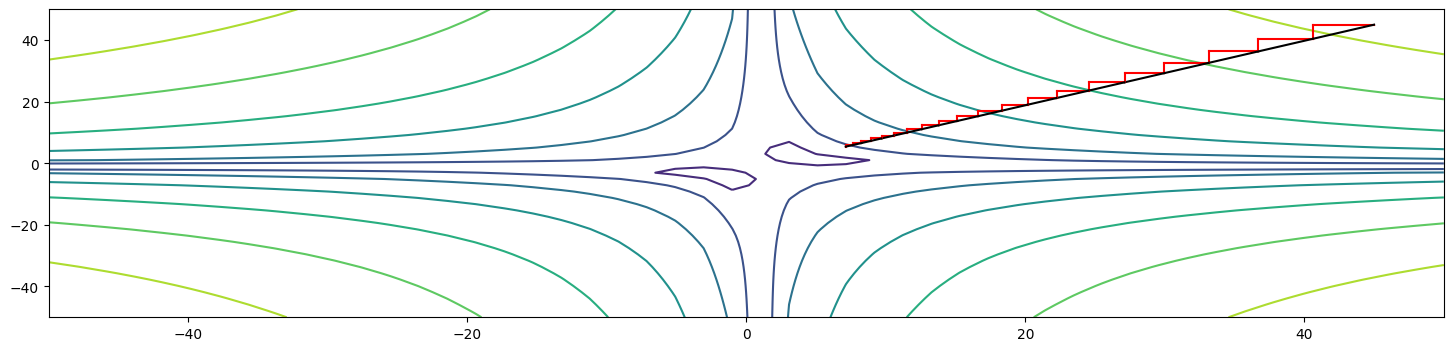

In [71]:
w1,w2 = .1,1; s,x0 = 20,45.0*np.ones((2,1)); fig,ax = plt.subplots(figsize=(18,4)); ax.contour(x1, x2, np.sqrt(y)) # ax.set(aspect=1) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html#examples-using-matplotlib-pyplot-figure
for k in range(s):# coordinate-wise and vector-wise successive overrelaxation
    xkm1 = x0.copy()
    for i in range(2):
        xk = x0.copy(); univariate_f = build_univariate_f(x0[1-i][0], i); xi = optimize.minimize_scalar(univariate_f, method='brent').x
        xk[i] = (1-w1)*xk[i]+w1*xi; plt.plot([x0[0],xk[0]], [x0[1],xk[1]], 'r'); x0 = xk.copy()
    xk = (1-w2)*xkm1+w2*xk; plt.plot([xkm1[0],xk[0]], [xkm1[1],xk[1]], 'k'); xkm1 = xk.copy(); x0 = xkm1.copy()


> ***Nonsquare Gauss-Seidel?***
> 
> - As presented, ***Gauss-Seidel*** is for ***square*** problems where the number of parameters $x$ and the number of outcomes $b$ have the same dimension.  This presumption is also implicit in the specification of ***Nonlinear Gauss-Seidel***. But could this work for ***nonsquare***  $A_{n\times p} x_{p \times 1} = b_{n \times 1}$ or $f(x_{p \times 1})=b_{n \times 1}$ problems? 
> 
> There are some [relatively recent results](https://arxiv.org/pdf/1706.07640.pdf) regarding convergence of the cyclically iterative strategy in the case of ***nonsquare*** (***under*** and ***overdetermined***) ***systems of linear equations*** such as $f_{A_{n\times p}}(x_{1\times p})=A_{n\times p} x_{1\times p} =b_{1\times p}$. The ***bisection*** method  $x_j^{(k+1)} = g(A_{i,\cdot},b_i,x_{-j}^{(k)})$ in this context would thus instead find
>
> $$0 = f_{A_{i,\cdot}}(x^{(k+1)}_1,\cdots, x_{j-1}^{(k+1)}, x_{j}^{(k+1)}, x_{j+1}^{(k)},\cdots, x_{p}^{(k)}) - b_i$$
>
> where $f_{A}(x)_i = f_{A_{i,\cdot}}(x) = b_i$ is assumed so $f_{A}(x)_i = b_i$ does not require the complete $A$.


<a name="cell-opt-fx-linesearch1"></a>
### 6.2.D Line Search (and Direction Search) ([Return to TOC](#cell-solving)) 
---
$\quad\;\;\bullet\;\;$ ***Nonlinear Gauss-Seidel*** "optimally" updates one direction $x_j$ at a time $$\scriptsize\overset{\text{(depending on context)}}{\min_{\alpha^{(k)}} \rho(\alpha^{(k)}) \;\text{ or } \;\max_{\alpha^{(k)}} \rho(\alpha^{(k)})} \quad \text{ where } \quad \rho(\alpha^{(k)}) = f\left(x^{(k)}_j + \alpha^{(k)}d^{(k)}\right) = \overbrace{f\left(x^{(k)} + \alpha^{(k)}e_j^{(k)}\right)}^{\text{if updating the $x_j$ direction}}$$
- <font style='color:white'>Finding the optimal distance to update $x^{(k)}$ to $x^{(k+1)}$ for an arbitrary direction $d^{(k)}$ the (also ***univariate***) <u>***line search problem***</u> where now $\quad\;\;\; \rho(\alpha^{(k)}) = f\left(x^{(k)} + \alpha^{(k)}d^{(k)}\right)$</font>

- <font style='color:white'>***Successive overrelaxation*** provides a mechanism to stabilize and influence the direction $d^{(k)} = x^{(k+1)} - x^{(k)}$ 
but does not subsequently address the ***line search problem*** for  $d^{(k)}$</font> 

<font style='color:white'>***Line search*** is a ***univariate*** (easier) subproblem of ***multivariate optimization***; but, for it to be useful<font> 

<font style='color:white'>$\quad\;\;\bullet\;\;$ $d^{(k)}$ must be a "good" direction; otherwise, computational resources spent<br>$\quad\quad\;\;$finding "optimal" $\alpha^{(k)}$ might be better spent towards finding a better $d^{(k)}$ <br>
    $\quad\;\;\bullet\;\;$ A computational tradeoff and dimenishing returns naturally appear here</font>


<a name="cell-opt-fx-linesearch2"></a>
### 6.2.D Line Search (and Direction Search) ([Return to TOC](#cell-solving)) 
---
$\quad\;\;\bullet\;\;$ ***Nonlinear Gauss-Seidel*** "optimally" updates one direction $x_j$ at a time $$\scriptsize\overset{\text{(depending on context)}}{\min_{\alpha^{(k)}} \rho(\alpha^{(k)}) \;\text{ or } \;\max_{\alpha^{(k)}} \rho(\alpha^{(k)})} \quad \text{ where } \quad \rho(\alpha^{(k)}) = f\left(x^{(k)}_j + \alpha^{(k)}d^{(k)}\right) = \overbrace{f\left(x^{(k)} + \alpha^{(k)}e_j^{(k)}\right)}^{\text{if updating the $x_j$ direction}}$$
- Finding the optimal distance to update $x^{(k)}$ to $x^{(k+1)}$ for an arbitrary direction $d^{(k)}$ the (also ***univariate***) <u>***line search problem***</u> where now $\quad\;\;\; \rho(\alpha^{(k)}) = f\left(x^{(k)} + \alpha^{(k)}d^{(k)}\right)$

- <font style='color:white'>***Successive overrelaxation*** provides a mechanism to stabilize and influence the direction $d^{(k)} = x^{(k+1)} - x^{(k)}$ 
but does not subsequently address the ***line search problem*** for  $d^{(k)}$</font> 

<font style='color:white'>***Line search*** is a ***univariate*** (easier) subproblem of ***multivariate optimization***; but, for it to be useful<font> 

<font style='color:white'>$\quad\;\;\bullet\;\;$ $d^{(k)}$ must be a "good" direction; otherwise, computational resources spent<br>$\quad\quad\;\;$finding "optimal" $\alpha^{(k)}$ might be better spent towards finding a better $d^{(k)}$ <br>
    $\quad\;\;\bullet\;\;$ A computational tradeoff and dimenishing returns naturally appear here</font>


<a name="cell-opt-fx-linesearch3"></a>
### 6.2.D Line Search (and Direction Search) ([Return to TOC](#cell-solving)) 
---
$\quad\;\;\bullet\;\;$ ***Nonlinear Gauss-Seidel*** "optimally" updates one direction $x_j$ at a time $$\scriptsize\overset{\text{(depending on context)}}{\min_{\alpha^{(k)}} \rho(\alpha^{(k)}) \;\text{ or } \;\max_{\alpha^{(k)}} \rho(\alpha^{(k)})} \quad \text{ where } \quad \rho(\alpha^{(k)}) = f\left(x^{(k)}_j + \alpha^{(k)}d^{(k)}\right) = \overbrace{f\left(x^{(k)} + \alpha^{(k)}e_j^{(k)}\right)}^{\text{if updating the $x_j$ direction}}$$
- Finding the optimal distance to update $x^{(k)}$ to $x^{(k+1)}$ for an arbitrary direction $d^{(k)}$ the (also ***univariate***) <u>***line search problem***</u> where now $\quad\;\;\; \rho(\alpha^{(k)}) = f\left(x^{(k)} + \alpha^{(k)}d^{(k)}\right)$

- ***Successive overrelaxation*** provides a mechanism to stabilize and influence the direction $d^{(k)} = x^{(k+1)} - x^{(k)}$ 
but does not subsequently address the ***line search problem*** for  $d^{(k)}$

<font style='color:white'>***Line search*** is a ***univariate*** (easier) subproblem of ***multivariate optimization***; but, for it to be useful<font> 

<font style='color:white'>$\quad\;\;\bullet\;\;$ $d^{(k)}$ must be a "good" direction; otherwise, computational resources spent<br>$\quad\quad\;\;$finding "optimal" $\alpha^{(k)}$ might be better spent towards finding a better $d^{(k)}$ <br>
    $\quad\;\;\bullet\;\;$ A computational tradeoff and dimenishing returns naturally appear here</font>


<a name="cell-opt-fx-linesearch"></a>
### 6.2.D Line Search (and Direction Search) ([Return to TOC](#cell-solving)) 
---
$\quad\;\;\bullet\;\;$ ***Nonlinear Gauss-Seidel*** "optimally" updates one direction $x_j$ at a time $$\scriptsize\overset{\text{(depending on context)}}{\min_{\alpha^{(k)}} \rho(\alpha^{(k)}) \;\text{ or } \;\max_{\alpha^{(k)}} \rho(\alpha^{(k)})} \quad \text{ where } \quad \rho(\alpha^{(k)}) = f\left(x^{(k)}_j + \alpha^{(k)}d^{(k)}\right) = \overbrace{f\left(x^{(k)} + \alpha^{(k)}e_j^{(k)}\right)}^{\text{if updating the $x_j$ direction}}$$
- Finding the optimal distance to update $x^{(k)}$ to $x^{(k+1)}$ for an arbitrary direction $d^{(k)}$ the (also ***univariate***) <u>***line search problem***</u> where now $\quad\;\;\; \rho(\alpha^{(k)}) = f\left(x^{(k)} + \alpha^{(k)}d^{(k)}\right)$

- ***Successive overrelaxation*** provides a mechanism to stabilize and influence the direction $d^{(k)} = x^{(k+1)} - x^{(k)}$ 
but does not subsequently address the ***line search problem*** for  $d^{(k)}$ 

***Line search*** is a ***univariate*** (easier) subproblem of ***multivariate optimization***; but, for it to be useful 

$\quad\;\;\bullet\;\;$ $d^{(k)}$ must be a "good" direction; otherwise, computational resources spent<br>$\quad\quad\;\;$finding "optimal" $\alpha^{(k)}$ might be better spent towards finding a better $d^{(k)}$ <br>
$\quad\;\;\bullet\;\;$ A computational tradeoff and dimenishing returns naturally appear here


<a name="cell-opt-fx-linesearch2"></a>
### 6.2.D Line Search (and Direction Search) 
---

`STA410_W24_Week6_Extra_LineSearch_ConjugateGradientMethods.ipynb` gives more examples of efficient approximate line search methods, e.g., polynomial approximation, ***backtracking***, ternary or golden section search, sufficient decrease and curvature conditions...

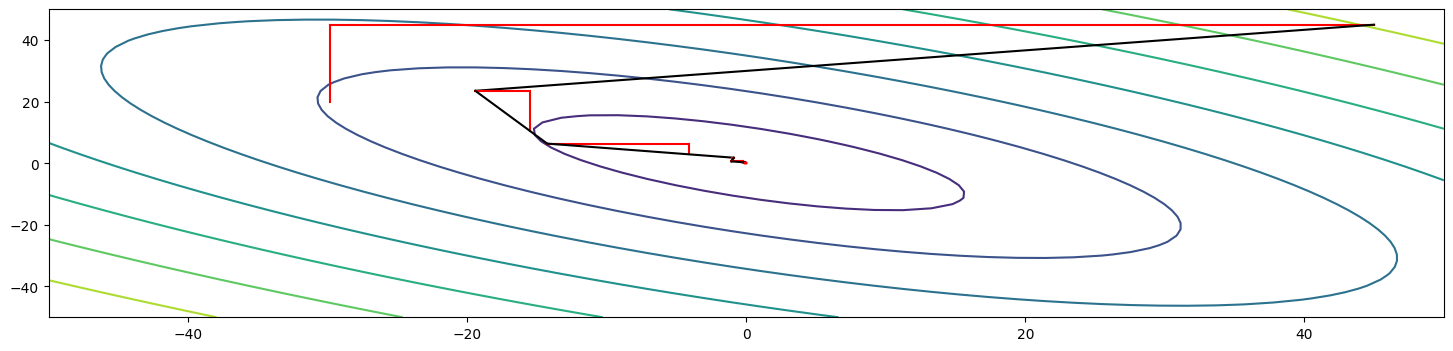

In [51]:
w1,w2 = 1,1; s,x0 = 20,45.0*np.ones((2,1)); fig,ax = plt.subplots(figsize=(18,4)); ax.contour(x1, x2, np.sqrt(y)) # ax.set(aspect=1) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html#examples-using-matplotlib-pyplot-figure
for k in range(s): # coordinate-wise and vector-wise successive overrelaxation
    xkm1 = x0.copy(); 
    for i in range(2):
        xk = x0.copy(); univariate_f = build_univariate_f(x0[1-i][0], i); xi = optimize.minimize_scalar(univariate_f, method='brent').x
        xk[i] = (1-w1)*xk[i]+w1*xi; plt.plot([x0[0],xk[0]], [x0[1],xk[1]], 'r'); x0 = xk.copy()
    xk = (1-w2)*xkm1+w2*xk; dk = xk-xkm1; ls = lambda a: (xkm1 + a*dk).T@A@(xkm1 + a*dk) + (xkm1 + a*dk).T@b + c
    xk = xkm1+dk*optimize.minimize_scalar(ls, method='brent').x
    plt.plot([xkm1[0],xk[0]], [xkm1[1],xk[1]], 'k'); xkm1 = xk.copy(); x0 = xkm1.copy()

<a name="cell-sovling-gradients-steepest"></a>
## 6.3 Gradient (Steepest Direction) Descent ([Return to TOC](#cell-solving))
--- 
***Successive relaxation*** for ***Gauss Seidel*** demonstrates ***convergence*** improvements despite reduced ***step size*** length, showing the benefit of (even indirectly) identifying better update directions $d^{(k)}$

The intuitive choice for efficiently moving $x^{(k+1)} = x^{(k)} +\alpha^{(k)}d^{(k)}$ along multiple coordinate axes simultaneously to minimize <font style='color:gray'>scalar valued multivariate</font> function $f_x$ would use the ***gradient***

$$ -\left[\nabla_{x} (f_x)\right]\!(x^{(k)}) \; \text { evaluated at $x^{(k)}$ which we write as } \; -\nabla_x f(x^{(k)})$$

<span style='color:white'>
This is the [direction of steepest descent](https://math.stackexchange.com/questions/223252/why-is-gradient-the-direction-of-steepest-ascent) of $f_x$ at $x^{(k)}$ so updating $x^{(k)}$ in the direction for 
$$ f(x) = \frac{1}{2}(b - Ax)^T A^{-1} (b - Ax) \quad \quad \overbrace{- \nabla_{x} f(x^{(k)}) = b - A x^{(k)}}^{\text{direction of steepest descent of $f$ at $x^{(k)}$}}$$
$$x^{(k+1)} = x^{(k)} + \alpha \left[ - \nabla_{x} f(x^{(k)}) \right] = x^{(k)} + \alpha (b - Ax^{(k)}) \; \mathbf{= O(n^2)}$$

means that for an appropriate step size factor $\alpha \quad f(x^{(k+1)}) < f(x^{(k)}) \quad$<br>and if the direction $b-Ax^{(k)} = 0\;$ then $x^{(k)}$ is already the minimum so $x^{(k+1)}$ will not change</span>



<a name="cell-sovling-gradients-steepest"></a>
## 6.3 Gradient (Steepest Direction) Descent ([Return to TOC](#cell-solving))
--- 
***Successive relaxation*** for ***Gauss Seidel*** demonstrates ***convergence*** improvements despite reduced ***step size*** length, showing the benefit of (even indirectly) identifying better update directions $d^{(k)}$

The intuitive choice for efficiently moving $x^{(k+1)} = x^{(k)} +\alpha^{(k)}d^{(k)}$ along multiple coordinate axes simultaneously to minimize <font style='color:gray'>scalar valued multivariate</font> function $f_x$ would use the ***gradient***

$$ -\left[\nabla_{x} (f_x)\right]\!(x^{(k)}) \; \text { evaluated at $x^{(k)}$ which we write as } \; -\nabla_x f(x^{(k)})$$


This is the [direction of steepest descent](https://math.stackexchange.com/questions/223252/why-is-gradient-the-direction-of-steepest-ascent) of $f_x$ at $x^{(k)}$ so updating $x^{(k)}$ in the direction for 
$$ f(x) = \frac{1}{2}(b - Ax)^T A^{-1} (b - Ax) \quad \quad \overbrace{- \nabla_{x} f(x^{(k)}) = b - A x^{(k)}}^{\text{direction of steepest descent of $f$ at $x^{(k)}$}}$$
$$x^{(k+1)} = x^{(k)} + \alpha \left[ - \nabla_{x} f(x^{(k)}) \right] = x^{(k)} + \alpha (b - Ax^{(k)}) \; \mathbf{= O(n^2)}$$

<span style='color:white'>means that for an appropriate step size factor $\alpha \quad f(x^{(k+1)}) < f(x^{(k)}) \quad$<br>and if the direction $b-Ax^{(k)} = 0\;$ then $x^{(k)}$ is already the minimum so $x^{(k+1)}$ will not change</span>



<a name="cell-sovling-gradients-steepest"></a>
## 6.3 Gradient (Steepest Direction) Descent ([Return to TOC](#cell-solving))
--- 
***Successive relaxation*** for ***Gauss Seidel*** demonstrates ***convergence*** improvements despite reduced ***step size*** length, showing the benefit of (even indirectly) identifying better update directions $d^{(k)}$

The intuitive choice for efficiently moving $x^{(k+1)} = x^{(k)} +\alpha^{(k)}d^{(k)}$ along multiple coordinate axes simultaneously to minimize <font style='color:gray'>scalar valued multivariate</font> function $f_x$ would use the ***gradient***

$$ -\left[\nabla_{x} (f_x)\right]\!(x^{(k)}) \; \text { evaluated at $x^{(k)}$ which we write as } \; -\nabla_x f(x^{(k)})$$

This is the [direction of steepest descent](https://math.stackexchange.com/questions/223252/why-is-gradient-the-direction-of-steepest-ascent) of $f_x$ at $x^{(k)}$ so updating $x^{(k)}$ in the direction for 
$$ f(x) = \frac{1}{2}(b - Ax)^T A^{-1} (b - Ax) \quad \quad \overbrace{- \nabla_{x} f(x^{(k)}) = b - A x^{(k)}}^{\text{direction of steepest descent of $f$ at $x^{(k)}$}}$$
$$x^{(k+1)} = x^{(k)} + \alpha \left[ - \nabla_{x} f(x^{(k)}) \right] = x^{(k)} + \alpha (b - Ax^{(k)}) \; \mathbf{= O(n^2)}$$

means that for an appropriate step size factor $\alpha \quad f(x^{(k+1)}) < f(x^{(k)}) \quad$<br>and if the direction $b-Ax^{(k)} = 0\;$ then $x^{(k)}$ is already the minimum so $x^{(k+1)}$ will not change



## 6.3 Gradient (Steepest Direction) Descent 
---

As with ***Gauss-Seidel*** the ***iterative method*** of ***gradient descent*** for the $Ax=b$ problem is $O(sn^2)$.


In [52]:
import tensorflow as tf; import numpy as np # https://www.tensorflow.org/guide/autodiff
A = np.diag(np.ones(2)) + 1.0; Ainv = tf.constant(np.linalg.inv(A), dtype='float32')
A = tf.constant(A, dtype='float32'); b = tf.constant(np.array([[1],[1]]), dtype='float32')
x = tf.Variable([[1.0], [1.0]])
# You will put this to use inside of a for loop for STA410_W24_Week6_Homework_GradientDescent.ipynb
with tf.GradientTape(persistent=True) as tape:
  # min_x f(x) = min_x (b-Ax)^TA^{-1}(b-Ax) 
  #            = min_x b^TA^{-1}b - 2 b^tA^{-1}Ax + (Ax)^TA^{-1}Ax
  #            = min_x b^TA^{-1}b - 2 b^tx + (Ax)^Tx 
  # gradient_x f(x) = -2b+2Ax) 
  # gradient_x f(x) = -2(b-Ax)
  fx = tf.transpose(b-A@x)@Ainv@(b-A@x)

                   # gradient of fx with respect to x
gradient_x_fx = tape.gradient(fx, x)
-2*(b-A@x), gradient_x_fx
# so we don't have to actually calculate any derivatives mathematically
# we just have to write fx, and then ask for it's gradient with respect to other variables

(<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
 array([[4.],
        [4.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 1), dtype=float32, numpy=
 array([[4.],
        [4.]], dtype=float32)>)

In [21]:
# STA410_W24_Week6_Homework_GradientDescent.ipynb will implement this using tensorflow above
A_ = np.diag(np.ones(2)) + 1.0; b_=np.ones((2,1))
x_ = np.zeros((2,1))
K = 30; alpha=0.1
for i in range(K):
    x_ -= alpha*(-2*(b_-A_@x_))
x_, A_@x_, b_

(array([[0.33333333],
        [0.33333333]]),
 array([[1.],
        [1.]]),
 array([[1.],
        [1.]]))

<a name="cell-sovling-gradients-auto1"></a>
### 6.3.A `AutoDiff` (Automatic Differentiation) ([Return to TOC](#cell-solving))
--- 

$$\scriptsize \text{When the partial derivative }\quad \frac{\partial f(x_1 \cdots x_{i+1} \cdots x_m)}{dx_i} = \underset{h \rightarrow 0}{\lim} \frac{f(x_1 \cdots x_{i+1}+h \cdots x_m)-f(x)}{h}\quad\text{exists}$$

[***finite differences numerical differentiation***](https://en.wikipedia.org/wiki/Numerical_differentiation) approximates it with sufficient convergence of

$$\scriptsize \frac{f(x_1 \cdots x_i^{(k)} \cdots x_m)-f(x_1 \cdots x_i \cdots x_m)}{x^{(k)}-x_i} \longrightarrow c \approx \frac{\partial f(x)}{dx_i}  \quad \text{ as $x^{(k)}_i \longrightarrow  x_i$ for $k=1,2,...,m$}$$

This is computationally prohibitive, but for functions with known analytical derivatives...

$\quad\;\;\bullet\;$ the [***chain rule***](https://en.wikipedia.org/wiki/Chain_rule) [for derivatives](https://en.wikipedia.org/wiki/Chain_rule_(probability)) means function composition gradients have<br>$\quad\quad\;$algorithmically derivable analytic multiplicative partial derivative forms via [`AutoDiff`](https://www.cs.toronto.edu/~rgrosse/courses/csc421_2019/readings/L06%20Automatic%20Differentiation.pdf)<br> 
<font style='color:white'>$\quad\quad\quad\bullet\;$ making breakthrough methodologies (e.g., Deep Neural Networks) now possible<br>
$\quad\quad\quad\quad\;\;\bullet\;$ without even needing to think about calculating derivatives by hand...</font>

<font style='color:white'>AutoDiff catalyzed Google [TensorFlow],
Facebook [PyTorch], and Apache [MXNET]; and ***probabilistic programming*** with [TensorFlow Probability] (and see also [Edward]), [PyMC]<br>(which uses [Theano] and [Jax] rather than [TensorFlow]), and [Stan] (proprietary AutoDiff)</font> 

<a name="cell-sovling-gradients-auto2"></a>
### 6.3.A `AutoDiff` (Automatic Differentiation) ([Return to TOC](#cell-solving))
--- 

$$\scriptsize \text{When the partial derivative }\quad \frac{\partial f(x_1 \cdots x_{i+1} \cdots x_m)}{dx_i} = \underset{h \rightarrow 0}{\lim} \frac{f(x_1 \cdots x_{i+1}+h \cdots x_m)-f(x)}{h}\quad\text{exists}$$

[***finite differences numerical differentiation***](https://en.wikipedia.org/wiki/Numerical_differentiation) approximates it with sufficient convergence of

$$\scriptsize \frac{f(x_1 \cdots x_i^{(k)} \cdots x_m)-f(x_1 \cdots x_i \cdots x_m)}{x^{(k)}-x_i} \longrightarrow c \approx \frac{\partial f(x)}{dx_i}  \quad \text{ as $x^{(k)}_i \longrightarrow  x_i$ for $k=1,2,...,m$}$$

This is computationally prohibitive, but for functions with known analytical derivatives...

$\quad\;\;\bullet\;$ the [***chain rule***](https://en.wikipedia.org/wiki/Chain_rule) [for derivatives](https://en.wikipedia.org/wiki/Chain_rule_(probability)) means function composition gradients have<br>$\quad\quad\;$algorithmically derivable analytic multiplicative partial derivative forms via [`AutoDiff`](https://www.cs.toronto.edu/~rgrosse/courses/csc421_2019/readings/L06%20Automatic%20Differentiation.pdf)<br> 
$\quad\quad\quad\bullet\;$ making breakthrough methodologies (e.g., Deep Neural Networks) now possible<br>
$\quad\quad\quad\quad\;\;\bullet\;$ without even needing to think about calculating derivatives by hand...

<font style='color:white'>AutoDiff catalyzed Google [TensorFlow],
Facebook [PyTorch], and Apache [MXNET]; and ***probabilistic programming*** with [TensorFlow Probability] (and see also [Edward]), [PyMC]<br>(which uses [Theano] and [Jax] rather than [TensorFlow]), and [Stan] (proprietary AutoDiff)</font> 

<a name="cell-sovling-gradients-auto"></a>
### 6.3.A `AutoDiff` (Automatic Differentiation) ([Return to TOC](#cell-solving))
--- 

$$\scriptsize \text{When the partial derivative }\quad \frac{\partial f(x_1 \cdots x_{i+1} \cdots x_m)}{dx_i} = \underset{h \rightarrow 0}{\lim} \frac{f(x_1 \cdots x_{i+1}+h \cdots x_m)-f(x)}{h}\quad\text{exists}$$

[***finite differences numerical differentiation***](https://en.wikipedia.org/wiki/Numerical_differentiation) approximates it with sufficient convergence of

$$\scriptsize \frac{f(x_1 \cdots x_i^{(k)} \cdots x_m)-f(x_1 \cdots x_i \cdots x_m)}{x^{(k)}-x_i} \longrightarrow c \approx \frac{\partial f(x)}{dx_i}  \quad \text{ as $x^{(k)}_i \longrightarrow  x_i$ for $k=1,2,...,m$}$$

This is computationally prohibitive, but for functions with known analytical derivatives...

$\quad\;\;\bullet\;$ the [***chain rule***](https://en.wikipedia.org/wiki/Chain_rule) [for derivatives](https://en.wikipedia.org/wiki/Chain_rule_(probability)) means function composition gradients have<br>$\quad\quad\;$algorithmically derivable analytic multiplicative partial derivative forms via [`AutoDiff`](https://www.cs.toronto.edu/~rgrosse/courses/csc421_2019/readings/L06%20Automatic%20Differentiation.pdf)<br> 
$\quad\quad\quad\bullet\;$ making breakthrough methodologies (e.g., Deep Neural Networks) now possible<br>
$\quad\quad\quad\quad\;\;\bullet\;$ without even needing to think about calculating derivatives by hand...

`AutoDiff` catalyzed Google [TensorFlow](https://www.tensorflow.org/),
Facebook [PyTorch](https://pytorch.org/), and Apache [MXNET](https://mxnet.apache.org/versions/1.9.0/); and ***probabilistic programming*** with [TensorFlow Probability](https://www.tensorflow.org/probability) (and see also [Edward](http://edwardlib.org/)), [PyMC](https://docs.pymc.io/en/v3/)<br>(which uses [Theano](https://en.wikipedia.org/wiki/Theano_(software)) and [Jax](https://pymc-devs.medium.com/the-future-of-pymc3-or-theano-is-dead-long-live-theano-d8005f8a0e9b) rather than [TensorFlow](https://pymc-devs.medium.com/theano-tensorflow-and-the-future-of-pymc-6c9987bb19d5)), and [Stan](https://mc-stan.org/) (proprietary `AutoDiff`) 

<a name="cell-sovling-gradients-auto1"></a>
### 6.3.A `AutoDiff` (Automatic Differentiation)
--- 

Moving away from the $Ax=b$ problem, suppose we wanted to use ***gradient descent*** to optimize 
$$\displaystyle \min_{w,b} \sum_{i=1}^n\overbrace{\frac{1}{2}(y_i-h(x_i^Tw + b))^2}^{L(w,b)}$$
<font style='color:white'>What are $\frac{\partial L(w,b)}{\partial w}$ / $\frac{\partial L(w,b)}{\partial b}$ for $ w^{(k+1)} = w^{(k)} - \alpha \frac{\partial L(w^{(k)},b^{(k)})}{\partial w^{(k)}} $ / $ b^{(k+1)} = b^{(k)} - \alpha \frac{\partial L_i(w^{(k+1)},b^{(k)})}{\partial b^{(k)}}$ ?</font>

<font style='color:white'>This is ***function decomposition*** with ***analytically known derivatives*** so apply the ***chain rule***...</font>

<span style='color:white'>
    $L_i(\cdot) = f_1(f_2(f_3(f_4(\cdot)))) \; $ so $\; \frac{\partial L_i(\cdot)}{\partial w} = \frac{\partial f_1}{\partial f_2}\frac{\partial f_2}{\partial f_3}\frac{\partial f_3}{\partial f_4}\frac{\partial f_4}{\partial w} \;$ and $\; \frac{\partial L_i(\cdot)}{\partial b} = \frac{\partial f_1}{\partial f_2}\frac{\partial f_2}{\partial f_3}\frac{\partial f_3}{\partial f_4}\frac{\partial f_4}{\partial b}$

$$\scriptsize \begin{array}{lllll} z=y_i-h(x_i^Tw + b) & z=h(x_i^Tw + b) & z=x_i^Tw + b & z=w & \tilde z=b \\f_1(z) = \frac{z^2}{2} & f_2(z) = y_i-z & f_3(z) = h(z) & f_4(z) =  x_i^Tz + b & f_4(\tilde z) =  x_i^Tw + \tilde z \\f_1'(z) = z & f_2'(z) = -1 & f_3'(z) = h'(z) & f_4'(z) = x_i & f_4'(\tilde z)=1\end{array}$$

$$\scriptsize\frac{\partial L_i(w,b)}{\partial b} = -(y_i-h(x_i^Tw^{(k)} + b^{(k)}))h'(x_i^Tw^{(k)} + b^{(k)})\quad \text{ and } \quad \frac{\partial L_i(w,b)}{\partial w} = \frac{\partial L_i(w,b)}{\partial b}x_i$$
</span>


<a name="cell-sovling-gradients-auto2"></a>
### 6.3.A `AutoDiff` (Automatic Differentiation)
--- 

Moving away from the $Ax=b$ problem, suppose we wanted to use ***gradient descent*** to optimize 
$$\displaystyle \min_{w,b} \sum_{i=1}^n\overbrace{\frac{1}{2}(y_i-h(x_i^Tw + b))^2}^{L(w,b)}$$
What are $\frac{\partial L(w,b)}{\partial w}$ / $\frac{\partial L(w,b)}{\partial b}$ for $ w^{(k+1)} = w^{(k)} - \alpha \frac{\partial L(w^{(k)},b^{(k)})}{\partial w^{(k)}} $ / $ b^{(k+1)} = b^{(k)} - \alpha \frac{\partial L(w^{(k+1)},b^{(k)})}{\partial b^{(k)}}$ ?

This is ***function decomposition*** with ***analytically known derivatives*** so apply the ***chain rule***...

<span style='color:white'>
    $L_i(\cdot) = f_1(f_2(f_3(f_4(\cdot)))) \; $ so $\; \frac{\partial L_i(\cdot)}{\partial w} = \frac{\partial f_1}{\partial f_2}\frac{\partial f_2}{\partial f_3}\frac{\partial f_3}{\partial f_4}\frac{\partial f_4}{\partial w} \;$ and $\; \frac{\partial L_i(\cdot)}{\partial b} = \frac{\partial f_1}{\partial f_2}\frac{\partial f_2}{\partial f_3}\frac{\partial f_3}{\partial f_4}\frac{\partial f_4}{\partial b}$

$$\scriptsize \begin{array}{lllll} z=y_i-h(x_i^Tw + b) & z=h(x_i^Tw + b) & z=x_i^Tw + b & z=w & \tilde z=b \\f_1(z) = \frac{z^2}{2} & f_2(z) = y_i-z & f_3(z) = h(z) & f_4(z) =  x_i^Tz + b & f_4(\tilde z) =  x_i^Tw + \tilde z \\f_1'(z) = z & f_2'(z) = -1 & f_3'(z) = h'(z) & f_4'(z) = x_i & f_4'(\tilde z)=1\end{array}$$

$$\scriptsize\frac{\partial L_i(w,b)}{\partial b} = -(y_i-h(x_i^Tw^{(k)} + b^{(k)}))h'(x_i^Tw^{(k)} + b^{(k)})\quad \text{ and } \quad \frac{\partial L_i(w,b)}{\partial w} = \frac{\partial L_i(w,b)}{\partial b}x_i$$
</span>


<a name="cell-sovling-gradients-auto3"></a>
### 6.3.A `AutoDiff` (Automatic Differentiation)
--- 

Moving away from the $Ax=b$ problem, suppose we wanted to use ***gradient descent*** to optimize 
$$\displaystyle \min_{w,b} \sum_{i=1}^n\overbrace{\frac{1}{2}(y_i-h(x_i^Tw + b))^2}^{L(w,b)}$$
What are $\frac{\partial L(w,b)}{\partial w}$ / $\frac{\partial L(w,b)}{\partial b}$ for $ w^{(k+1)} = w^{(k)} - \alpha \frac{\partial L(w^{(k)},b^{(k)})}{\partial w^{(k)}} $ / $ b^{(k+1)} = b^{(k)} - \alpha \frac{\partial L(w^{(k+1)},b^{(k)})}{\partial b^{(k)}}$ ?

This is ***function decomposition*** with ***analytically known derivatives*** so apply the ***chain rule***...

$L_i(\cdot) = f_1(f_2(f_3(f_4(\cdot)))) \; $ so $\; \frac{\partial L_i(\cdot)}{\partial w} = \frac{\partial f_1}{\partial f_2}\frac{\partial f_2}{\partial f_3}\frac{\partial f_3}{\partial f_4}\frac{\partial f_4}{\partial w} \;$ and $\; \frac{\partial L_i(\cdot)}{\partial b} = \frac{\partial f_1}{\partial f_2}\frac{\partial f_2}{\partial f_3}\frac{\partial f_3}{\partial f_4}\frac{\partial f_4}{\partial b}$

<span style='color:white'>
$$\scriptsize \begin{array}{lllll} z=y_i-h(x_i^Tw + b) & z=h(x_i^Tw + b) & z=x_i^Tw + b & z=w & \tilde z=b \\f_1(z) = \frac{z^2}{2} & f_2(z) = y_i-z & f_3(z) = h(z) & f_4(z) =  x_i^Tz + b & f_4(\tilde z) =  x_i^Tw + \tilde z \\f_1'(z) = z & f_2'(z) = -1 & f_3'(z) = h'(z) & f_4'(z) = x_i & f_4'(\tilde z)=1\end{array}$$

$$\scriptsize\frac{\partial L_i(w,b)}{\partial b} = -(y_i-h(x_i^Tw^{(k)} + b^{(k)}))h'(x_i^Tw^{(k)} + b^{(k)})\quad \text{ and } \quad \frac{\partial L_i(w,b)}{\partial w} = \frac{\partial L_i(w,b)}{\partial b}x_i$$
</span>


<a name="cell-sovling-gradients-auto4"></a>
### 6.3.A `AutoDiff` (Automatic Differentiation)
--- 

Moving away from the $Ax=b$ problem, suppose we wanted to use ***gradient descent*** to optimize 
$$\displaystyle \min_{w,b} \sum_{i=1}^n\overbrace{\frac{1}{2}(y_i-h(x_i^Tw + b))^2}^{L(w,b)}$$
What are $\frac{\partial L(w,b)}{\partial w}$ / $\frac{\partial L(w,b)}{\partial b}$ for $ w^{(k+1)} = w^{(k)} - \alpha \frac{\partial L(w^{(k)},b^{(k)})}{\partial w^{(k)}} $ / $ b^{(k+1)} = b^{(k)} - \alpha \frac{\partial L(w^{(k+1)},b^{(k)})}{\partial b^{(k)}}$ ?

This is ***function decomposition*** with ***analytically known derivatives*** so apply the ***chain rule***...

$L_i(\cdot) = f_1(f_2(f_3(f_4(\cdot)))) \; $ so $\; \frac{\partial L_i(\cdot)}{\partial w} = \frac{\partial f_1}{\partial f_2}\frac{\partial f_2}{\partial f_3}\frac{\partial f_3}{\partial f_4}\frac{\partial f_4}{\partial w} \;$ and $\; \frac{\partial L_i(\cdot)}{\partial b} = \frac{\partial f_1}{\partial f_2}\frac{\partial f_2}{\partial f_3}\frac{\partial f_3}{\partial f_4}\frac{\partial f_4}{\partial b}$

$$\scriptsize \begin{array}{lllll} z=y_i-h(x_i^Tw + b) & z=h(x_i^Tw + b) & z=x_i^Tw + b & z=w & \tilde z=b \\f_1(z) = \frac{z^2}{2} & f_2(z) = y_i-z & f_3(z) = h(z) & f_4(z) =  x_i^Tz + b & f_4(\tilde z) =  x_i^Tw + \tilde z \\f_1'(z) = z & f_2'(z) = -1 & f_3'(z) = h'(z) & f_4'(z) = x_i & f_4'(\tilde z)=1\end{array}$$

<span style='color:white'>
$$\scriptsize\frac{\partial L_i(w,b)}{\partial b} = -(y_i-h(x_i^Tw^{(k)} + b^{(k)}))h'(x_i^Tw^{(k)} + b^{(k)})\quad \text{ and } \quad \frac{\partial L_i(w,b)}{\partial w} = \frac{\partial L_i(w,b)}{\partial b}x_i$$
</span>


<a name="cell-sovling-gradients-auto"></a>
### 6.3.A `AutoDiff` (Automatic Differentiation)
--- 

Moving away from the $Ax=b$ problem, suppose we wanted to use ***gradient descent*** to optimize 
$$\displaystyle \min_{w,b} \sum_{i=1}^n\overbrace{\frac{1}{2}(y_i-h(x_i^Tw + b))^2}^{L(w,b)}$$
What are $\frac{\partial L(w,b)}{\partial w}$ / $\frac{\partial L(w,b)}{\partial b}$ for $ w^{(k+1)} = w^{(k)} - \alpha \frac{\partial L(w^{(k)},b^{(k)})}{\partial w^{(k)}} $ / $ b^{(k+1)} = b^{(k)} - \alpha \frac{\partial L(w^{(k+1)},b^{(k)})}{\partial b^{(k)}}$ ? 

This is ***function decomposition*** with ***analytically known derivatives*** so apply the ***chain rule***...

$L_i(\cdot) = f_1(f_2(f_3(f_4(\cdot)))) \; $ so $\; \frac{\partial L_i(\cdot)}{\partial w} = \frac{\partial f_1}{\partial f_2}\frac{\partial f_2}{\partial f_3}\frac{\partial f_3}{\partial f_4}\frac{\partial f_4}{\partial w} \;$ and $\; \frac{\partial L_i(\cdot)}{\partial b} = \frac{\partial f_1}{\partial f_2}\frac{\partial f_2}{\partial f_3}\frac{\partial f_3}{\partial f_4}\frac{\partial f_4}{\partial b}$

$$\scriptsize \begin{array}{lllll} z=y_i-h(x_i^Tw + b) & z=h(x_i^Tw + b) & z=x_i^Tw + b & z=w & \tilde z=b \\f_1(z) = \frac{z^2}{2} & f_2(z) = y_i-z & f_3(z) = h(z) & f_4(z) =  x_i^Tz + b & f_4(\tilde z) =  x_i^Tw + \tilde z \\f_1'(z) = z & f_2'(z) = -1 & f_3'(z) = h'(z) & f_4'(z) = x_i & f_4'(\tilde z)=1\end{array}$$

$$\scriptsize\frac{\partial L_i(w,b)}{\partial b} = -(y_i-h(x_i^Tw^{(k)} + b^{(k)}))h'(x_i^Tw^{(k)} + b^{(k)})\quad \text{ and } \quad \frac{\partial L_i(w,b)}{\partial w} = \frac{\partial L_i(w,b)}{\partial b}x_i$$



<a name="cell-sovling-gdall"></a>

### 6.3.B When can Gradient Descent work perfectly? ([Return to TOC](#cell-solving))

--- 

***Gradients*** are "predictive" (i.e., move in the direction) of the optimal direction when the objective function is ***isotropic*** ( spherically symmetric) rather than ***anisotropic*** (elliptical)

***Gradients*** that are "predictive" of the optimum mean a very large ***step size factor*** can be found for the ***line search problem*** so very few iterative steps are required to get close to the optimum 

|![](https://cdn-images-1.medium.com/max/1600/1*vXpodxSx-nslMSpOELhovg.png)| [Here](https://elsenaju.eu/Calculator/gradient-2d-plot.htm)'s an $x^T\!Ax$ demonstration<br><br>Try $A=\left[\begin{array}{cc} a&0\\0&b \end{array}\right]$<br><br>which is specified as<br><br>`(x*a+y*0)*x + (x*0+y*b)*y` |
|:-:|:-|
|[Blog discussing normalization, but applies to loss functions as well](https://machinelearningnotepad.wordpress.com/2018/04/15/gradient-descent/)| 
 |





